### Time-Independent 1-Dimensional Schrodinger Equation can be expressed as the following Equation.. 

\begin{align*}
    \hat{H} \psi({x}) &= E \psi({x})\\
    \left( -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right) \psi(x) &= E \psi(x)
\end{align*}

Where $E$ is the Energy of the Eigen-states $\psi(x)$.. (i.e. $\psi(x) \to 0 \text{ as } x \to \infty$)
$$h \approx 6.626\times 10^{-34} \text{ joule }\cdot \text{ seconds}$$
thus,
$$\hbar = \dfrac{h}{2\pi} \approx 1.055\times 10^{−34} \text{ joule }\cdot \text{ seconds}$$

Mass of the electron, $$m_e \approx 9.1 \times 10^{-31} Kg$$

#### Solution of the Schrodinger Wave Equation by Shooting Method

Required Modules to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.integrate import odeint, simps

### Infinite Square-Well Potential

\begin{equation*}
    V = 
    \left\{
        \begin{array}{lr}
            0 & &\text{if } 0\le x \le a \\
            \infty & &\text{elsewhere}
        \end{array}
    \right\}
\end{equation*}

Analytical expression for the Normalized Eigen-States, $$\psi_n(x) = \sqrt{\dfrac{2}{a}} \sin \left(\dfrac{n \pi}{a} x \right)$$
and Energy, $$E_n = \dfrac{n^{2} \pi^{2} \hbar^{2} }{2m_{e}a^2}$$

In [2]:
hbar = 1.055*10**(-34)
m_e = 9.1*10**(-31)
fact = (hbar**2)/(2*m_e)
print(fact)

6.115521978021978e-39


In [3]:
length = 5      #length of the Well
V = 0           #potential inside the well
X,h = np.linspace(0,length,100,retstep=True)        #Making an array for the X axis
U = [0,0.001]   #Initial values of dydx and d2ydx2(assumption)
energies = np.arange(0,20,0.2)          #taking an array of energies

The differential equation

In [4]:
def f(U,X,E):       #Reduced form of Schrodinger Equation
    y, z = U
    f1, f2 = z, (V-E)*y     
    return [f1,f2]

def shoot(E):       #Function for getting the last value of y(x) for various energy levels
    sol = odeint(f,U,X, args=(E,))
    return sol[:,0][-1]

hits = [shoot(E) for E in energies]

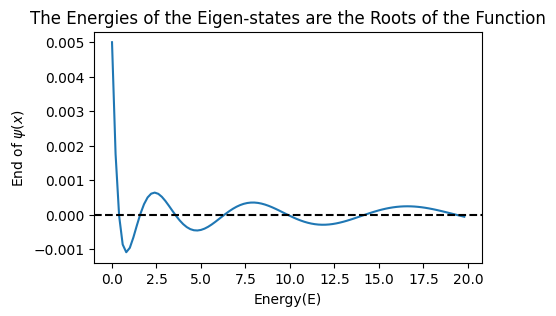

In [5]:
# Plot for the energy profile of the Solutions
plt.figure(figsize=(5,3))
plt.title("The Energies of the Eigen-states are the Roots of the Function")
plt.xlabel("Energy(E)")
plt.ylabel(r"End of $\psi(x)$")
plt.plot(energies,hits)
plt.axhline(linestyle = 'dashed',color = 'black')

In [6]:
Roots = []          #Creating an empty array for the assumption of the Roots(i.e. Energy of Eigen-state)
for i in range(1,len(energies)):
    e1 = energies[i-1]
    e2 = energies[i]
    if shoot(e1)*shoot(e2)<0:   #if the function crosses the X axis between e1 and e2 then the function will switch sign in between
        Roots.append([e1,e2])   #adding the intervals to the array
Roots = np.array(Roots)
n = np.shape(Roots)[0]          #Number of eigen-states to be displayed 

In [7]:
eps = np.zeros(n)   #Array for the energy eigen values
for i in range(n):
    eps[i] = bisect(shoot,Roots[i][0], Roots[i][1])     #Finding the energy of the Eigen-states from the basic assumptions using Bisection technique

E_n = fact*eps      #Energies of the Eigen-states in S.I. unit

Y_n = np.zeros((n,len(X)))
for i in range(n):
    solution = odeint(f,U,X,args=(eps[i],)) 
    Y_n[i,:] = solution[:,0]

#Normalization of the Wave-functions
def normal_psi(Y: list,X: list, n: int)->list:
    Psi = np.zeros_like(Y)
    for j in range(n):
        y = Y[j,:]
        N = 1/np.sqrt(simps(y*y,X))
        Psi[j] = N*y
    return Psi

Psi = normal_psi(Y_n,X,n)       #Normalaized Wave functions

Energy of the each Eigen-states in S.I. units

In [8]:
print("Energies of The Eigen-States are: \n")
for i in range(len(E_n)):
    e = E_n[i]
    print("psi_{}(x) : {}  joule*second".format(i,e))

Energies of The Eigen-States are: 

psi_0(x) : 2.414280959057681e-39  joule*second
psi_1(x) : 9.656940923215346e-39  joule*second
psi_2(x) : 2.1728899390816694e-38  joule*second
psi_3(x) : 3.862759593034836e-38  joule*second
psi_4(x) : 6.03560751485631e-38  joule*second
psi_5(x) : 8.691290382509398e-38  joule*second
psi_6(x) : 1.182991985469958e-37  joule*second


Plotting of the Wave-functions of allowed Energy-states

C:\Users\shrav\AppData\Local\Temp\ipykernel_11552\3616369337.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(row,3,i+1)


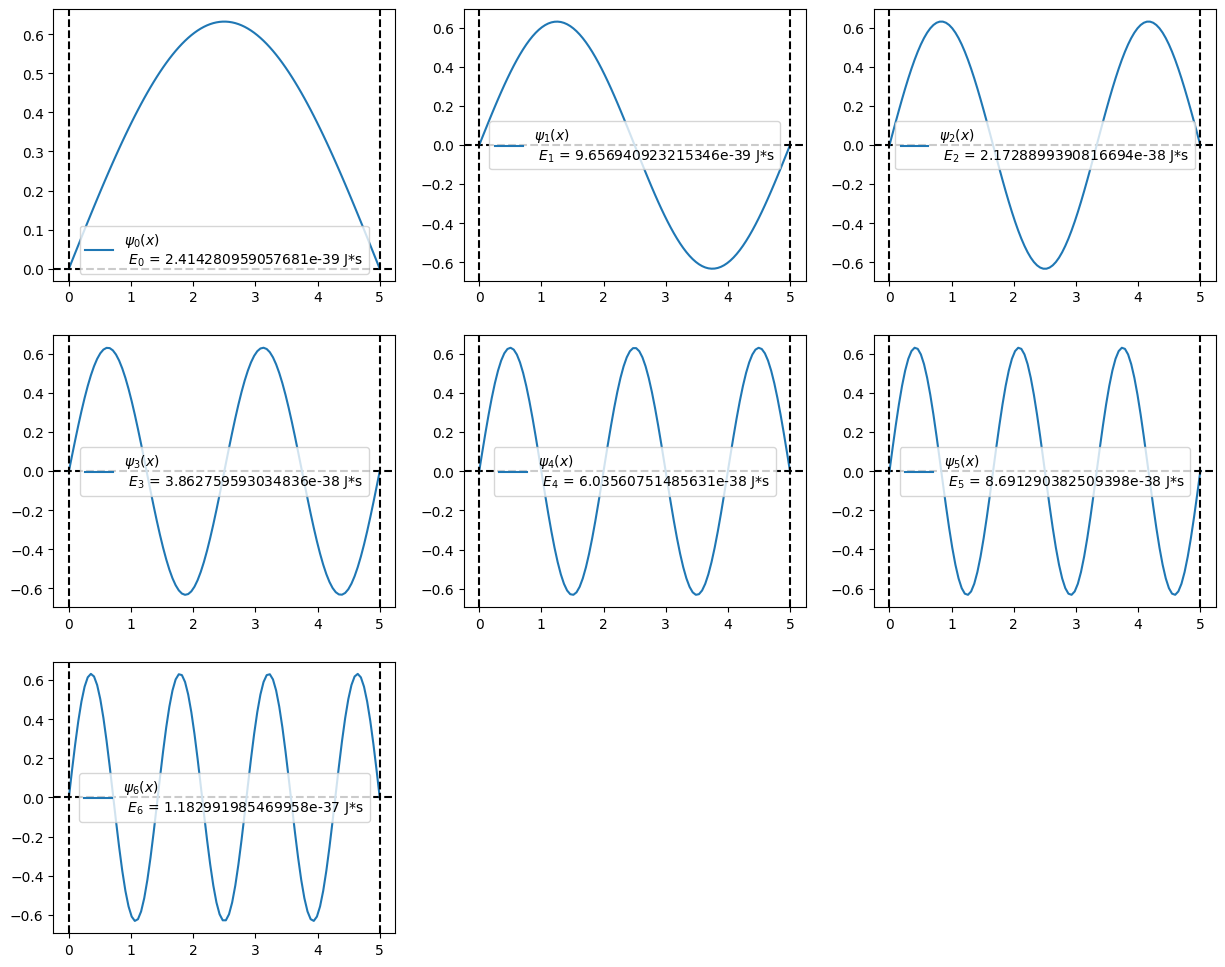

In [9]:
plt.figure(figsize=(15,12))
plt.xlabel(r'$X$')
plt.ylabel(r'$\psi(x)$')
for i in range(n):
    if n/3 > n//3:
        row = n//3 + 1
    else: row = int(n/3)    
    plt.subplot(row,3,i+1)
    plt.axhline(linestyle = 'dashed', color= 'black')
    plt.plot(X,Psi[i,:],label="$\psi_{}(x)$ \n $E_{}$ = {} J*s".format(i,i,E_n[i]))
    plt.axvline(x=0,color = 'black',linestyle ="dashed")
    plt.axvline(x=length,color = 'black',linestyle = "dashed")    
    plt.legend(loc='best')    
plt.show()    

### One Dimensional Quantum Harmonic Oscillator

$$V(x) = \frac{1}{2}m \omega^2 x^2$$

Analytical expression for the Normalized Eigen-States, $$\psi_n(x) = \left({\dfrac{m\omega}{\pi \hbar}}\right)^{\frac{1}{4}} \dfrac{1}{\sqrt{2^{n}n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right) e^{-\dfrac{1}{2}{\dfrac{m\omega}{\hbar}}x^2}$$
and Energy, $$E_n = \left(n+\frac{1}{2}\right)\hbar \omega$$


In [10]:
hbar = 1.055*10**(-34)
m_e = 9.1*10**(-31)
omega = 5
fact_o = (m_e*omega)/hbar
energy_fact_o = hbar*omega 
print(fact_o)

43127.96208530806


In [11]:
length = 5      #length of the Well
X_o,h = np.linspace(-length,length,200,retstep=True)        #Making an array for the X axis
V = X**2
U = [0,0.001]   #Initial values of dydx and d2ydx2(assumption)
energies_o = np.arange(0,6,0.01)          #taking an array of energies

The Differential Equation

In [12]:
def f(U: list,x,E):       #Reduced form of Schrodinger Equation
    y, z = U
    f1, f2 = z, (x**2-2*E)*y     
    return [f1,f2]

def shoot(E):       #Function for getting the last value of y(x) for various energy levels
    sol = odeint(f,U,X_o, args=(E,))
    return sol[:,0][-1]

hits_o = [shoot(E) for E in energies_o]

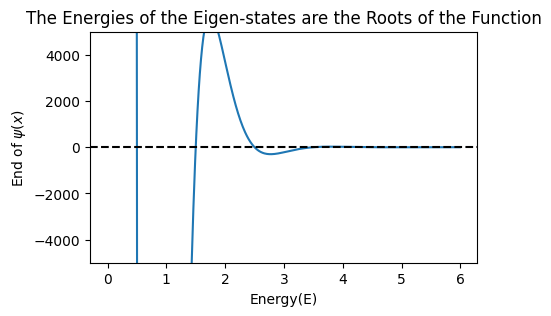

In [13]:
# Plot for the energy profile of the Solutions
plt.figure(figsize=(5,3))
plt.title("The Energies of the Eigen-states are the Roots of the Function")
plt.xlabel("Energy(E)")
plt.ylabel(r"End of $\psi(x)$")
plt.ylim(-5e3,5e3)
plt.plot(energies_o,hits_o)
plt.axhline(linestyle = 'dashed',color = 'black')

In [14]:
Roots_o = []          #Creating an empty array for the assumption of the Roots(i.e. Energy of Eigen-state)
for i in range(1,len(energies_o)):
    e1 = energies_o[i-1]
    e2 = energies_o[i]
    if shoot(e1)*shoot(e2)<0:   #if the function crosses the X axis between e1 and e2 then the function will switch sign in between
        Roots_o.append([e1,e2])   #adding the intervals to the array
Roots_o = np.array(Roots_o) 
n = np.shape(Roots_o)[0]          #Number of eigen-states to be displayed 

In [15]:
eps_o = np.zeros(n)   #Array for the energy eigen values
for i in range(n):
    eps_o[i] = bisect(shoot,Roots_o[i][0], Roots_o[i][1])     #Finding the energy of the Eigen-states from the basic assumptions using Bisection technique

E_no = energy_fact_o*eps_o      #Energies of the Eigen-states in S.I. unit

Y_no = np.zeros((n,len(X_o)))
for i in range(n):
    solution = odeint(f,U,X_o,args=(eps_o[i],)) 
    Y_no[i,:] = solution[:,0]

#Normalization of the Wave-functions
def normal_psi(Y: list,X: list, n: int)->list:
    Psi = np.zeros_like(Y)
    for j in range(n):
        y = Y[j,:]
        N = 1/np.sqrt(simps(y*y,X))
        Psi[j] = N*y
    return Psi

Psi_o = normal_psi(Y_no,X_o,n)       #Normalaized Wave functions

Energy of the each Eigen States in SI Units

In [16]:
print("Energies of The Eigen-States are: \n")
for i in range(len(E_no)):
    e = E_no[i]
    print("psi_{}(x) : {}  joule*second".format(i,e))

Energies of The Eigen-States are: 

psi_0(x) : 2.637500033817982e-34  joule*second
psi_1(x) : 7.912499965666183e-34  joule*second
psi_2(x) : 1.3187500653668975e-33  joule*second
psi_3(x) : 1.8462506947473534e-33  joule*second
psi_4(x) : 2.3737565602383024e-33  joule*second
psi_5(x) : 2.90130255428869e-33  joule*second


Plotting of the Eigen-States 

C:\Users\shrav\AppData\Local\Temp\ipykernel_11552\196352585.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(row,3,i+1)


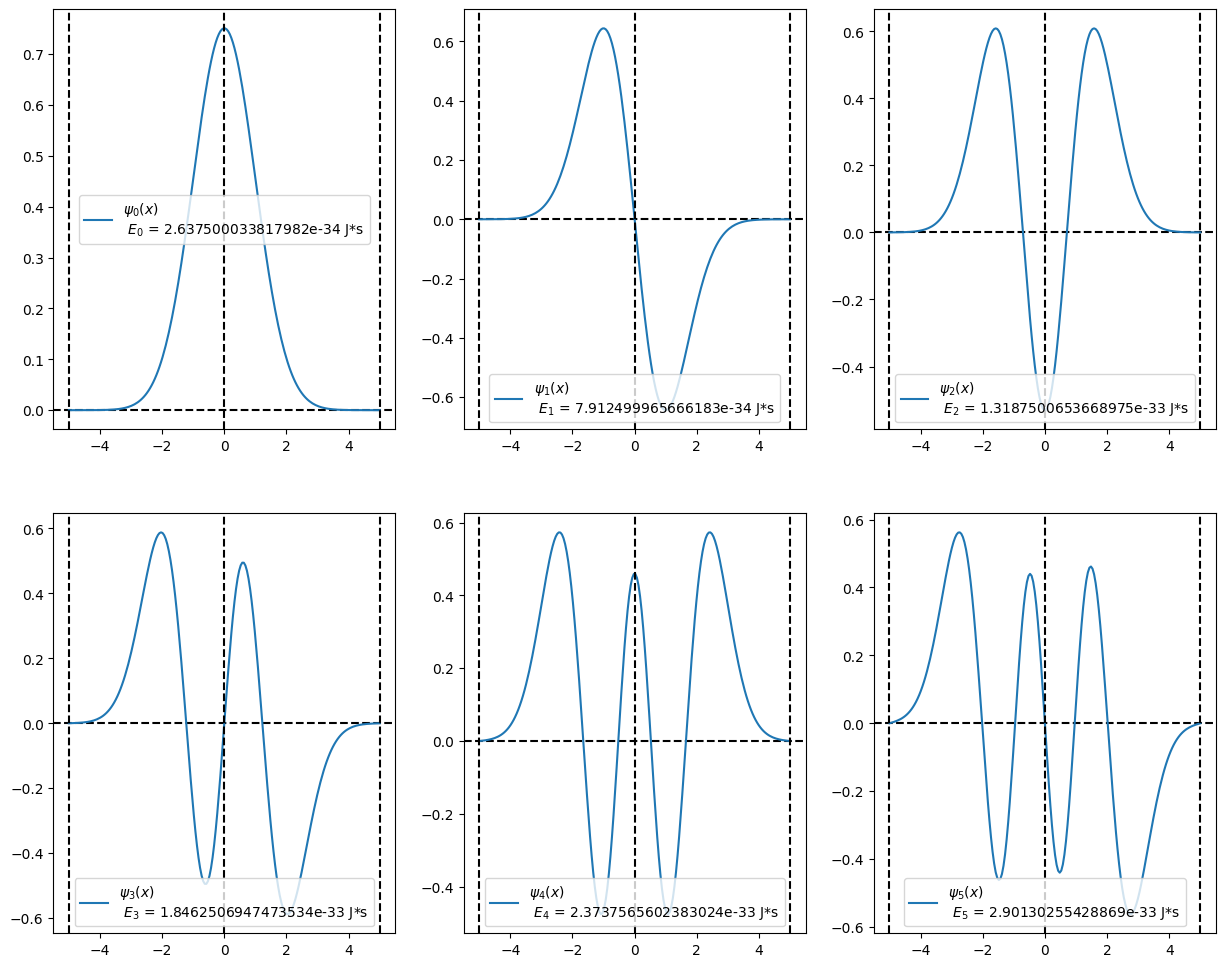

In [17]:
plt.figure(figsize=(15,12))
plt.xlabel(r'$X$')
plt.ylabel(r'$\psi(x)$')
for i in range(n):
    if n/3 > n//3:
        row = n//3 +1
    else: row = int(n/3)    
    plt.subplot(row,3,i+1)
    plt.axhline(linestyle = 'dashed', color= 'black')
    plt.plot(X_o,Psi_o[i,:],label="$\psi_{}(x)$ \n $E_{}$ = {} J*s".format(i,i,E_no[i]))
    plt.axvline(x=0,color = 'black',linestyle ="dashed")
    plt.axvline(x=length,color = 'black',linestyle = "dashed")
    plt.axvline(x=-length,color = 'black',linestyle = "dashed")      
    plt.legend(loc='best')    
plt.show()    